# Lab 6: Deep Learning with Keras for Regression
## Regression with Keras: California Housing Dataset
This notebook demonstrates how to perform regression using Keras on the California Housing dataset, including data visualization, model building, training, and evaluation.

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

## Load and Explore the Dataset
We load the California Housing dataset, which includes features like median income and house age, and the target is the median house value.

About this dataset
1. MedInc: Median income
2. HouseAge: Median house age
3. AveRooms: Average number of rooms for houses within a block
4. AveBedrms: Average number of bedrooms for houses within a block
5. Population: Total number of people residing within a block
6. AveOccup: Average number of people residing in each household
7. Latitude: A measure of how far north a house is; a higher value is farther north
8. Longitude: A measure of how far west a house is; a higher value is farther west 
9. MedHouseVal: Median house value for households within a block (measured in US Dollars)

Note. 9. is the target

In [2]:
# Load the dataset to a pandas dataframe(df)

# -------------------------------
# Your code here
# -------------------------------

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Visualize the Dataset
Let us plot some features against the target to understand their relationship.

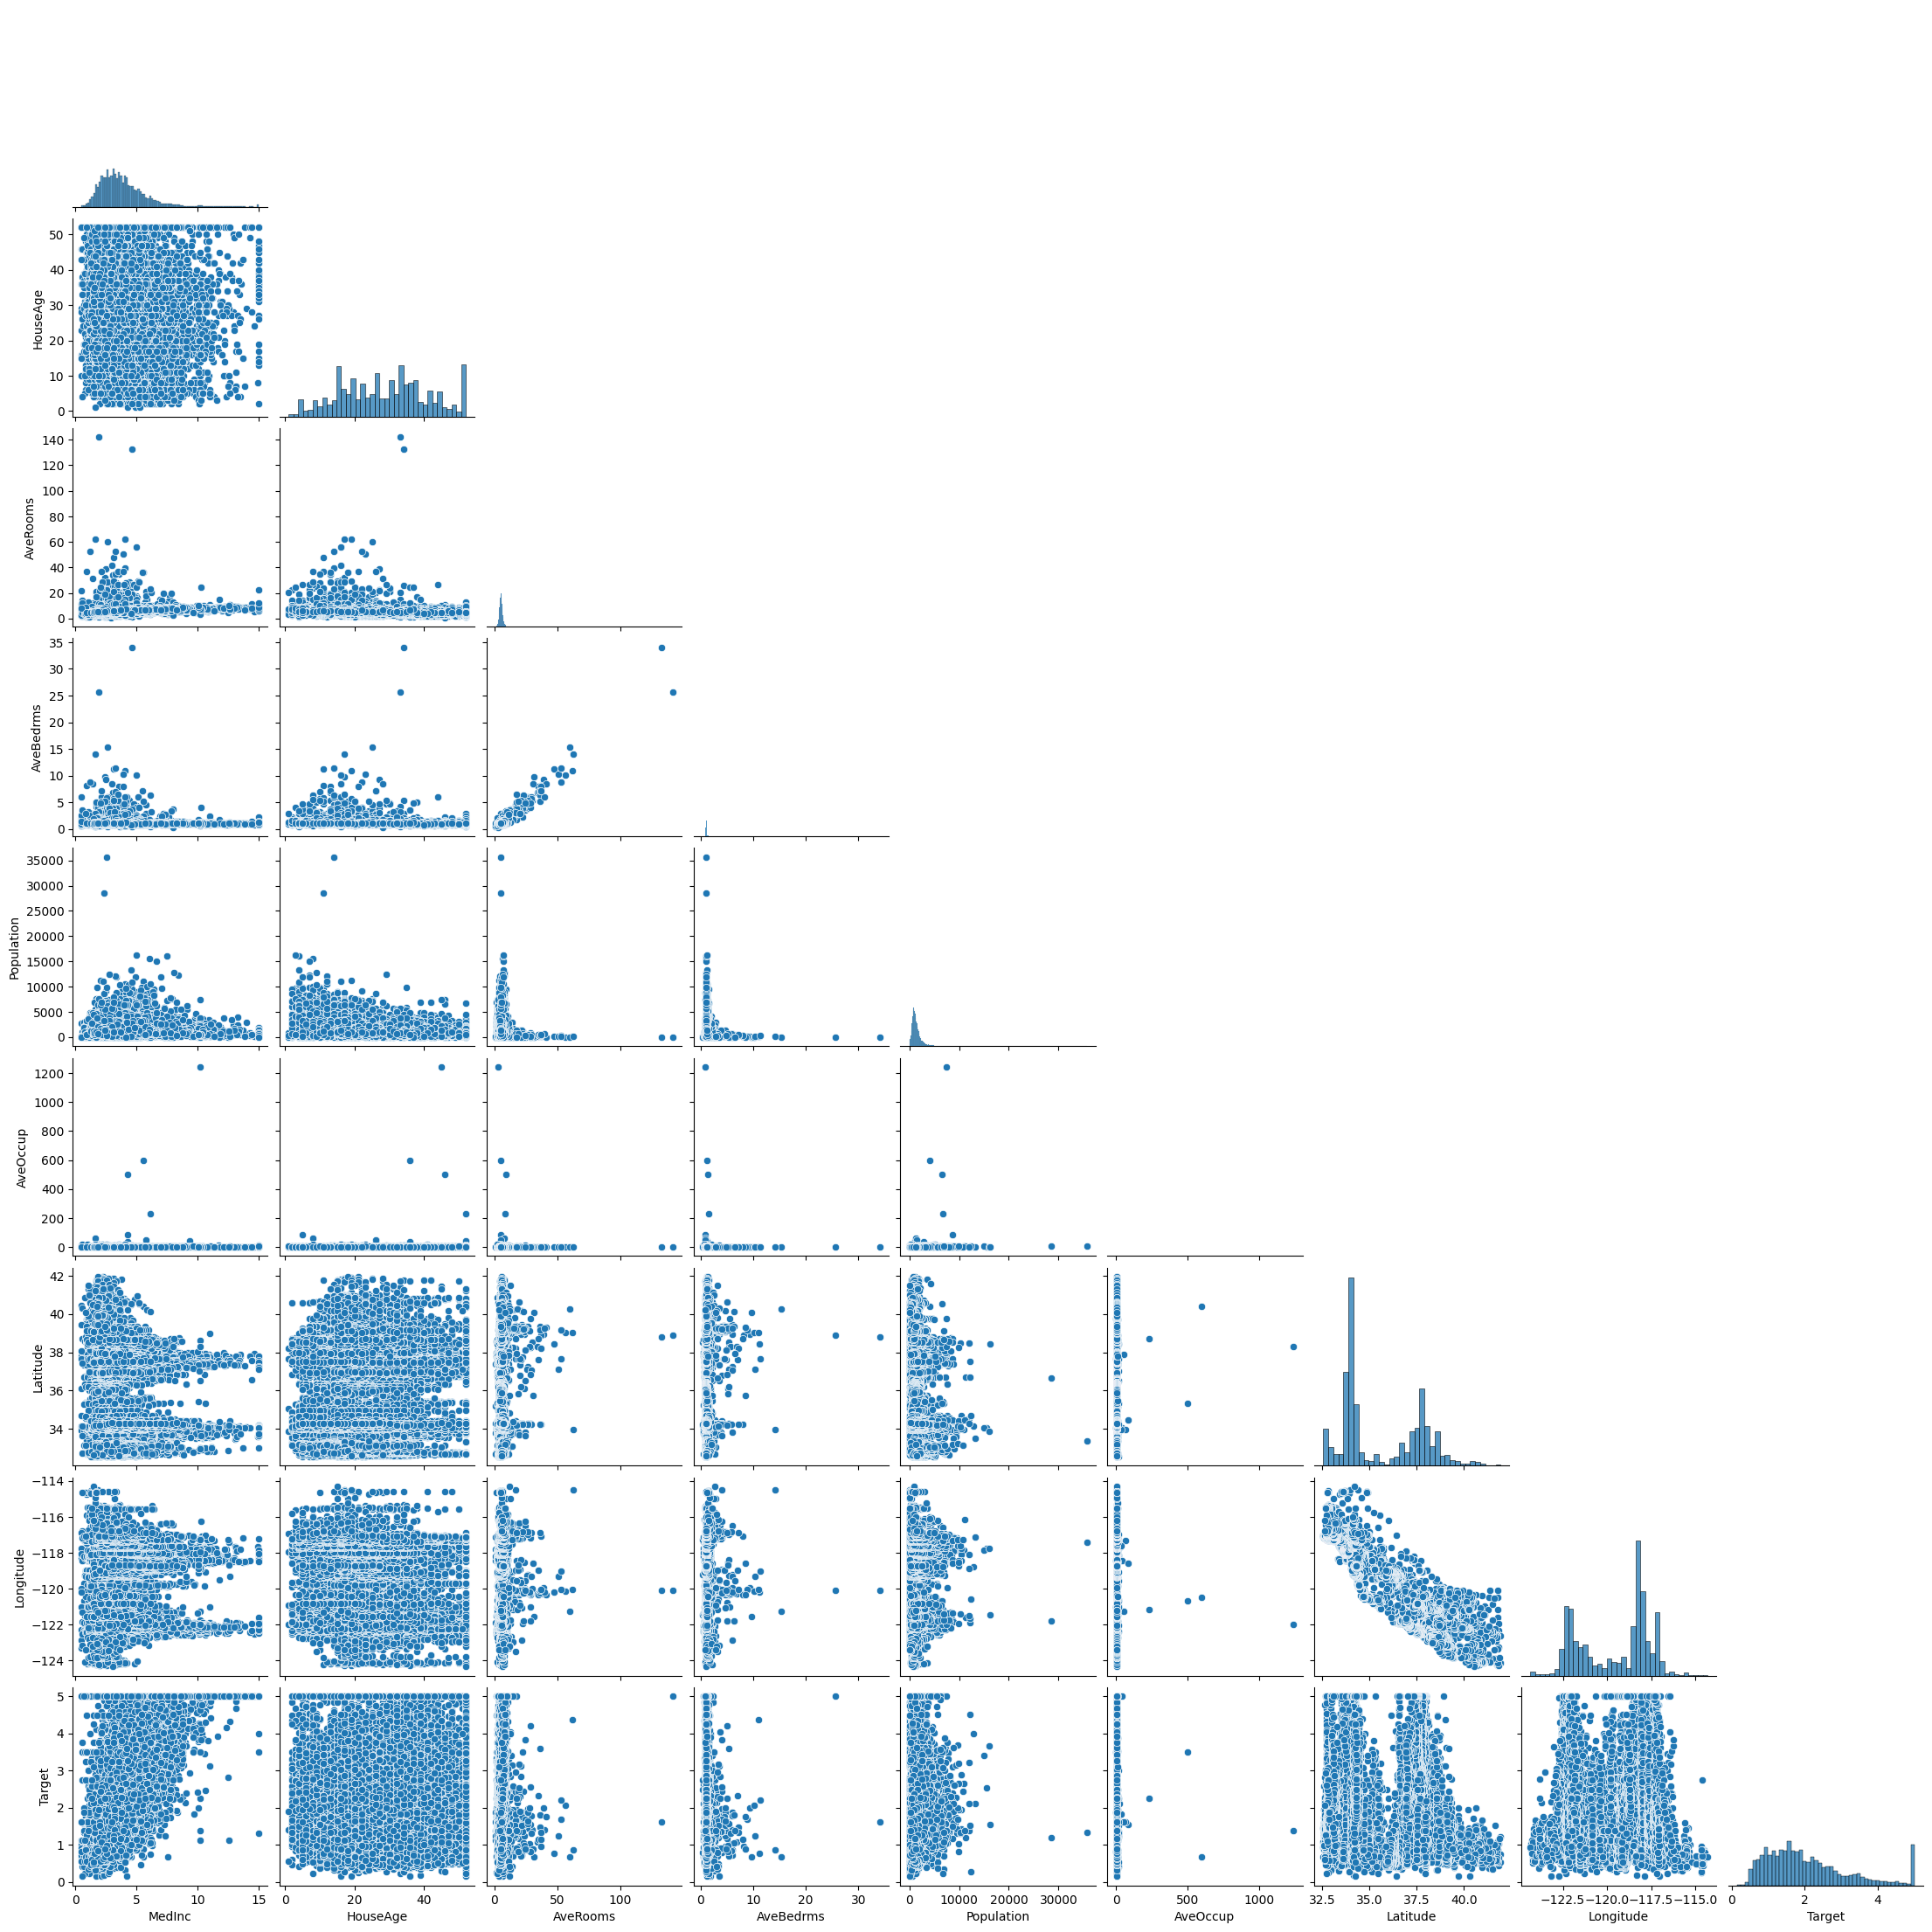

In [10]:
# Plot feature vs target
sns.pairplot(df, corner=True)

## Split and Scale the Dataset
We split the dataset into training and testing sets and scale the features to ensure the model trains effectively.

In [11]:
# Split the data using train_test_split function
# Use 20% of the data for testing and the rest for training
# Use random_state=42

# -------------------------------
# Your code here
# -------------------------------


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build the Model
We define a Sequential model with two hidden layers and a single output neuron for regression.

In [29]:
# Define the model
# Complete the code to build a Sequential model
# The model should have 3 layers with 64, 32 and 1 neuron respectively
# Use 'relu' activation function for the first two layers and no activation function for the last layer

model = Sequential([
    Dense(..., activation=..., input_dim=...),
    Dense(..., activation=...),
    Dense(...)  # Single output for regression
])

In [ ]:
# Compile the model
# Use Adam optimizer with learning rate 0.001 and MeanSquaredError as the loss function

# -------------------------------
# Your code here
# -------------------------------

## Train the Model
We train the model for 50 epochs, validating on the test data.

In [30]:
# Train the model
# Use 50 epochs and batch size of 32
# Use the test data as the validation data
# return the training history(history)

# -------------------------------
# Your code here
# -------------------------------

Epoch 1/50
516/516 [==============================] - 1s 942us/step - loss: 0.7765 - mae: 0.5861 - val_loss: 0.4910 - val_mae: 0.5218
Epoch 2/50
516/516 [==============================] - 0s 796us/step - loss: 0.5187 - mae: 0.4519 - val_loss: 0.3847 - val_mae: 0.4384
Epoch 3/50
516/516 [==============================] - 0s 835us/step - loss: 0.3801 - mae: 0.4317 - val_loss: 0.3660 - val_mae: 0.4320
Epoch 4/50
516/516 [==============================] - 0s 790us/step - loss: 0.3538 - mae: 0.4197 - val_loss: 0.3567 - val_mae: 0.4250
Epoch 5/50
516/516 [==============================] - 0s 796us/step - loss: 0.3422 - mae: 0.4115 - val_loss: 0.3450 - val_mae: 0.4172
Epoch 6/50
516/516 [==============================] - 0s 802us/step - loss: 0.3314 - mae: 0.4042 - val_loss: 0.3434 - val_mae: 0.4136
Epoch 7/50
516/516 [==============================] - 0s 806us/step - loss: 0.3249 - mae: 0.3983 - val_loss: 0.3513 - val_mae: 0.4336
Epoch 8/50
516/516 [==============================] - 0s 796us

## Visualize Training Performance
We plot the training and validation loss and MAE to observe the model's performance.

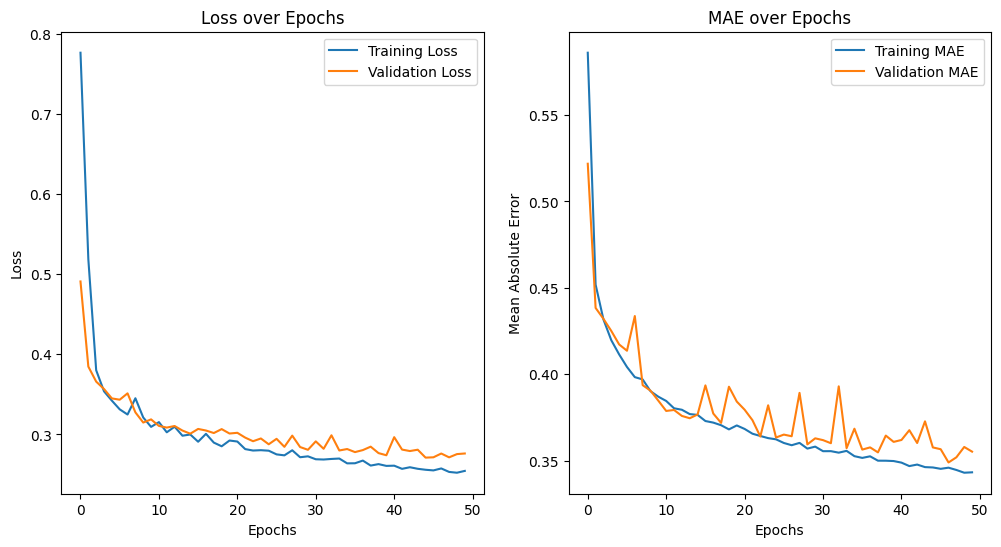

In [31]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

## Evaluate the Model
We evaluate the model's performance on the test set and make predictions.

In [ ]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.3f}')

In [ ]:
# Make predictions
predictions = model.predict(X_test[:10])
print('Predictions:', predictions.flatten())
print('True Values:', y_test[:10])

## Compare Predictions vs True Values
We plot the predicted vs true values for the first few samples.

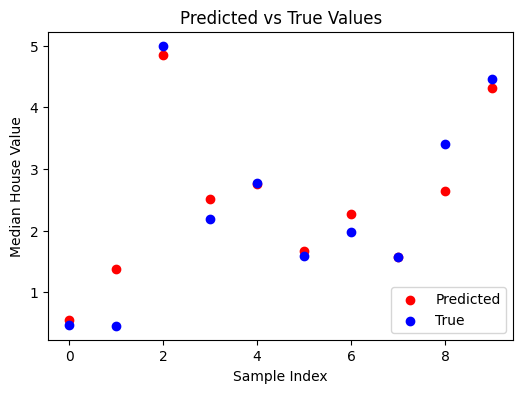

In [33]:
# Plot predictions vs true values
plt.figure(figsize=(6, 4))
plt.scatter(range(10), predictions.flatten(), label='Predicted', color='r')
plt.scatter(range(10), y_test[:10], label='True', color='b')
plt.title('Predicted vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.show()